# COGS 108 - Final Project 

# Introduction

As a leading fast food company over the world, McDonald's is known for its popularity and tremendous market power. Nonetheless, it also criticized by its unhealthy products and aggressive marketing strategies. Hence, in this project we focus on the potential influence to US McDonald's revenue from the raw materials prices, and we test some marketing strategies McDonald's may be using. We expect to proof several McDonald's strategies, and thus discuss if they are benign to our society.

# Overview

Our project is framed in a basic economic producer-saler model. In producer side, we use machine learning to find the correlations between McDonald's raw material prices and McDonald's revenues, and also predict McDonald's future revenues. In saler side, we use linear regression model to test the correlations between the number of McDonald's in a state and the population of that state. We also want to find the correlations between the ratings of McDonald's on yelp and the number of McDonald's in that area, yet after data analysis we find that our data doesn't support us to do this analysis.

# Names

- Xiaoquan Jiang
- Vidal Montelongo
- Ziyuan Wu
- Yao Tong

# Group Members IDs

- A14013665
- A15752278
- A14910716
- A13997064

# Research Question

Producer side:

- How does potato price, beef price, stock price and trading volume affect McDonald's revenues.

Saler side:

- How does the population in a state and the average ratings of McDonald's affect the number of McDonald's in that state.

# Part 1: Producer Side

# Background and Prior Work

We found four papers contributing to our understanding on the factors of McDonald’s revenue. These papers range from 2006-2014, which is correspondant to the time period of our data. The earlier time period of the papers provide us some useful background information and gives us a direction to construct our hypothesis on McDonald’s revenue. 

Parviz and Samreen’s paper(2012) argues that the switching strategies from promoting high-calorie food to healthy, diet choice brings ‘a record increase of 55% in the net income along with the record increase of 19% in cash from operations’. It provides us confidence to find the correlations between the ingredients and McDonald's revenues.


* Parvez and Samreen Azim. (2012)”Impact of Constructive Marketing Strategies on Return (Revenue & Profitability): A Case Study of Mcdonald’s” Asian Economic and Social Society ISSN: 2225-4226 Volume 2 Number 7, July

* http://www.aessweb.com/pdf-files/1-50-2(7)2012-JABS-153-169.pdf

 In the earliest paper(2016), Melanie’s New York Times magazine review, we see that the dollar menu, though consist of high calorie, unhealthy food choice, actually boost the revenue of McDonald’s by 170 percent in the previous 36 months before the articles. Hence, we can suspect that through choosing unhealthy ingredients McDonald's generate more profits.


* Melanie Warner. (2006)”Salads or No, Cheap Burgers Revive McDonald's” The New York Times April 19

* http://faculty.washington.edu/sundar/MM-BBUS320/Fun-READINGS/McDonalds.pdf

# Hypothesis

We hypothesize that the potato prices, beef prices, stock prices, and trading volumes can be important factors impacting McDonald’s revenue. We shape this hypothesis according our eomonic intuitions. We expect that the lower the beef prices and potato prices, the higher the stock prices and trading volumes, and the higher the revenues.

# Dataset(s)

 In our group, we looked over the internet to find 7 main datasets to be our main datasource. 
     
- Dataset Name: McDonald’s gross profit
- Link to the dataset: https://www.macrotrends.net/stocks/charts/MCD/mcdonalds/gross-profit
- Number of observations: 56

McDonald's revenue every quarter, the most basic dataset we use to analyze McDonald's revenue trendings over time and train our model to predict revenue from every factor we have come up with.


- Dataset Name: Beef price
- Link to the dataset: https://www.indexmundi.com/commodities/?commodity=beef&months=60)
- Number of observations: 59

Beef price in US every month, one factor about McDonald's supply.

- Dataset Name: Producer price index for potatoes
- Link to the dataset: https://fred.stlouisfed.org/series/WPU024502
- Number of observations: 340

Potato price in US every month, another factor about McDonald's supply.


- Dataset Name: McDonald’s stock price and trading volumes
- Link to the dataset: 
- Number of observations: 1091

McDonald's stock statistics, related to revenue.

# Setup

In [2]:
# imports
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plot

In [3]:
df_yelp_mc = pd.read_csv('McDonalds-Yelp-Sentiment-DFE.csv', encoding = "ISO-8859-1")
df_yelp_mc.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,policies_violated,policies_violated:confidence,city,policies_violated_gold,review
0,679455653,False,finalized,3,2/21/15 0:36,RudeService\rOrderProblem\rFilthy,1.0\r0.6667\r0.6667,Atlanta,NaN,"I'm not a huge mcds lover, but I've been to be..."
1,679455654,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,Terrible customer service. Î¾I came in at 9:30...
2,679455655,False,finalized,3,2/21/15 0:26,SlowService\rOrderProblem,1.0\r1.0,Atlanta,NaN,"First they ""lost"" my order, actually they gave..."
3,679455656,False,finalized,3,2/21/15 0:27,na,0.6667,Atlanta,NaN,I see I'm not the only one giving 1 star. Only...
4,679455657,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,"Well, it's McDonald's, so you know what the fo..."


In [4]:
# read the list from beef price
df_list_beef = pd.read_html("https://www.indexmundi.com/commodities/?commodity=beef&months=60")

beef_list = pd.read_html("https://www.indexmundi.com/commodities/?commodity=beef&months=60")

beef_df = beef_list[1]

In [5]:
# read the monthly potato price from 1990-12-01 to 2019-03-01
monthly_potato_price = pd.read_excel("Producer Price Index for Potato.xls")

# rename the producer price index
monthly_potato_price = monthly_potato_price.rename(index=str, columns={"WPU024502": "Price"})

monthly_potato_price.head()

,DATE,Price
0,1990-12-01,100.0
1,1991-01-01,100.8
2,1991-02-01,100.9
3,1991-03-01,100.7
4,1991-04-01,100.6


In [6]:
establishments = pd.read_excel("Number of establishments in the United States fast food industry.xlsx")
establishments.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Statistic as Excel data file,NaN
2,NaN,Number of establishments in the United States ...,NaN
3,NaN,Access data,NaN
4,NaN,NaN,NaN


In [7]:
df_stock = pd.read_csv("McDonald's Stock.csv")

df_list = pd.read_html("https://www.macrotrends.net/stocks/charts/MCD/mcdonalds/revenue")
df_yearly = df_list[0]
df_quarterly = df_list[1]

# Data Cleaning

Logistics
        Our process of cleaning and preprocessing can be divided into two parts: set a time range and excluding unrelatable information.
         Since we have a lot of different variables, and some of the datasets are as detailed as per day, some are as general as per year, after looking at all the datasets, we find that the time period from September 2014 to March 2018 is a good overlapping time period among all our datasets. 
        On the other hand, while some of our datasets include global information, or information that is other than McDonald’s(all fast food restaurants), we decide to use McDonald’s data. 



To discuss in detail, we picked only part of crucial features: revenue, beef price, potato price, average stock price, stock volume, and total transaction value. The data found was well formatted, but because it came from multiple sources we had to extract data that overlapped to show the relationship between the information found. The data found was divided into monthly values, but because our analysis was based on quarterly revenue we began by grouping the monthly values into their quarterly relationship. After grouping the data, we removed data that did not overlap. Although we found large amounts of data we had to condense the total points not only by a fraction by three but also had to remove the quarters before 2013 and after early 2018. The data also contained symbols that would not allow us to perform the calculations needed to form predictions for regression so removing unnecessary characters was also a large portion of the cleaning process. To further simplify creating a visualization we combined the multiple data frames created and removed the unnecessary data from each one. 



Load stock data, and pick Volume and Close price as features. Then use quarter as index and calculate average or total value for each quarter.

In [8]:
df_list = pd.read_html("https://www.macrotrends.net/stocks/charts/MCD/mcdonalds/revenue")
df_yearly = df_list[0]
df_quarterly = df_list[1]

#clean stock
df_stock_c = pd.DataFrame(df_stock[['Date', 'Close', 'Volume']])
df_stock_c['Value'] = df_stock_c.Close * df_stock_c.Volume
#print(df_stock_c)

df_stock_c['Quarter'] = np.nan
df_stock_c['Count'] = 1
for i in range(len(df_stock_c['Date'])):
    dates = df_stock_c['Date'][i].split('-')
    qt = (int(dates[0])-2013)*4 + int((int(dates[1])-1)/3) - 5
    df_stock_c.iloc[i, df_stock_c.columns.get_loc('Quarter')] = qt
    
df_stock_c.drop(df_stock_c[df_stock_c['Quarter'] < 0].index, inplace = True)
df_stk = pd.DataFrame(df_stock_c.groupby('Quarter').sum())
df_stk['Avg_Close'] = df_stk.Close / df_stk.Count
df_stk = pd.DataFrame(df_stk[['Volume', 'Value', 'Avg_Close']])


#stock cleaned, quarter 0 = 2013 Q4

Clean revenue data. Pick datapoints from the same time period

In [9]:
#clean revenue

df_quarterly.columns = ['Date', 'Revenue']
df_quarterly['Quarter'] = np.nan
for j in range(len(df_quarterly['Date'])):
    dates = df_quarterly['Date'][j].split(' ')
    q = dates[0]
    q = q.replace('Q', '')
    qt = int(q) - 7 + ((int(dates[1])-2013) * 4)
    df_quarterly.iloc[j, df_quarterly.columns.get_loc('Quarter')] = qt
    df_quarterly.iloc[j, df_quarterly.columns.get_loc('Revenue')] = int(df_quarterly.iloc[j, df_quarterly.columns.get_loc('Revenue')].replace("$", '').replace(',', ''))

df_quarterly.drop(df_quarterly[df_quarterly['Quarter'] < 0].index, inplace = True)
df_quarterly.drop(df_quarterly[df_quarterly['Quarter'] > 14].index, inplace = True)

Clean beef price. Leave only price as feature and set quarter as index.

In [10]:
# clean beef price
price_q_df = pd.DataFrame(columns=['Quarter', 'Beef Price', 'Change'])

k = 0
average_price = 0
average_price_list = []
for i in beef_df['Price']:
    average_price = average_price + float(i)
    k = k + 1
    if k % 3 == 0:
        average_price_list.append(average_price/3)
        average_price = 0

average_change_list = []
average_change = 0
k = 0

for i in beef_df['Change']:
    if i == "-":
        average_change = 0
    else:
        if "-" in i:
            t = i.replace("-", " ")
            temp = t.split(" ")        
            average_change = average_change + ((float(temp[1]) * -1)/3)

        else:
            temp = i.split(" ")
            average_change = average_change + (float(temp[0])/3)
            
    k = k + 1
    if k % 3 == 0:
        average_change_list.append(average_change)
        average_change = 0
        
quarter_list = []
for i in range(20):
    quarter_list.append(i)
    
price_q_df['Beef Price'] = average_price_list
price_q_df['Change'] = average_change_list
price_q_df['Quarter'] = quarter_list

price_q_df.drop(price_q_df[price_q_df['Quarter'] > 14].index, inplace = True)

Clean potato price, in the same way as beef price

In [11]:
# clean potato price

df_potato_c = monthly_potato_price
df_potato_c['Quarter'] = np.nan
df_potato_c['Count'] = 1
for i in range(len(df_potato_c['DATE'])):
    dates = str(df_potato_c['DATE'][i]).split('-')
    qt = (int(dates[0])-2013)*4 + int((int(dates[1])-1)/3) - 5
    df_potato_c.iloc[i, df_potato_c.columns.get_loc('Quarter')] = qt

df_potato_c.drop(df_potato_c[df_potato_c['Quarter'] < 0].index, inplace = True)
df_potato_c.drop(df_potato_c[df_potato_c['Quarter'] > 14].index, inplace = True)

df_potato_c = pd.DataFrame(df_potato_c.groupby('Quarter').sum())
df_potato_c['Potato Price'] = df_potato_c.Price / df_potato_c.Count
df_potato_c = pd.DataFrame(df_potato_c[['Potato Price']])


df_quarterly = df_quarterly.sort_values('Quarter', ascending = 1)
#for idx in reversed(df_quartley.index):
# print(idx, df_quartley.Even[idx], df_quartley.Odd[idx])


df_quarterly = df_quarterly.set_index('Quarter')
price_q_df = price_q_df.set_index('Quarter')
frames = [df_quarterly, price_q_df, df_stk, df_potato_c]
#df_stk.set_index('Quarter')
result = pd.concat(frames, axis=1)
result = result.drop(['Date', 'Change'], axis=1)
result.head()

,Revenue,Beef Price,Volume,Value,Avg_Close,Potato Price
Quarter,,,,,,
0.0,6987,4.570000,288422900.0,2.906975e+10,100.952857,188.433333
1.0,6572,5.873333,366295834.0,3.483240e+10,95.377656,189.033333
2.0,5959,5.480000,397954140.0,3.703380e+10,93.611406,189.600000
3.0,6498,4.806667,458754908.0,4.362340e+10,94.875246,189.233333
4.0,6615,4.530000,378236499.0,3.663023e+10,96.723492,188.966667


Plot data

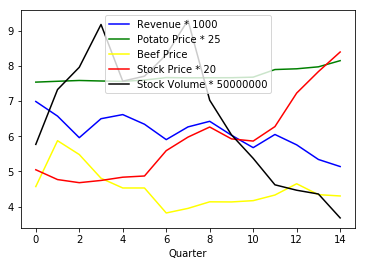

In [12]:
plot.plot(result.index, result['Revenue']/1000, color = 'blue', label = 'Revenue * 1000')
plot.plot(result.index, result['Potato Price']/25, color = 'green', label = 'Potato Price * 25')
plot.plot(result.index, result['Beef Price'], color = 'yellow')
plot.plot(result.index, result['Avg_Close']/20, color = 'red', label = 'Stock Price * 20')
plot.plot(result.index, result['Volume']/50000000, color = 'black', label = 'Stock Volume * 50000000')
plot.xlabel('Quarter')
plot.legend()

This chart above shows the distribution of data points in our five different variables. The x-axis represents the time and the y-axis represent the correlation value. Different lines represent different types of variables.

# Data Analysis & Results

From the six datasets, we are able to extract information and use them to analyze the affecting factors of McDonald’s revenue, the reference of McDonald’s revenue and the business plan of McDonald’s. We have the two datasets which are sources of our affecting factors of McDonald’s revenue(beef price, potato price). We have stock market information as one way to refer to McDonald’s business competitive capacity as well as a reference of its demand side, and we have both number of fast food restaurants change over year and the number of McDonald’s over different states to analyze McDonald’s business decision to benefit its revenue. We would like to construct a model to see if the factors we analyze are actually correlate with each other and affecting McDonald’s business decision.



We apply a linear regression model to analyze connections between data. The DataFrame cleaned above is used as training set, where y is set to McDonald's quarterly revenue, and X includes 5 dimensions: beef price, potato price, stock price, stock volume, and total stock transaction value.

In [14]:
#Apply Linear regression to see relationships between features


y = result['Revenue'].values
x = result.drop('Revenue', axis = 1).values
model = LinearRegression()
model.fit(x,y)
sq = model.score(x,y)
print(sq)
print(model.coef_)

0.7130419582091913
[ 7.22739140e+01 -5.73620268e-06  4.47507757e-08 -1.67816202e+01
 -6.99996639e+01]


Test the prediction model with some data

In [15]:
test_x = [[15, 200000000, 30000000000, 100, 200]]
current_x = [[4.46, 252960000, 51350880000, 203, 208]]
print(model.predict(test_x)[0])
print(model.predict(current_x)[0])

7071.895846040816
4673.303745123627


This chart shows the relationship between revenue and beef prices, and a prediction curve. The x-axis represent the beef price (US dollar per kilogram) and the y-axis represent the McDonald’s revenue(US dollar). These data points are scattered with large deviation and shows a weak positive connection between revenue and beef prices. (Coefficient:7.22739140e+01)



Text(0, 0.5, 'revenue')

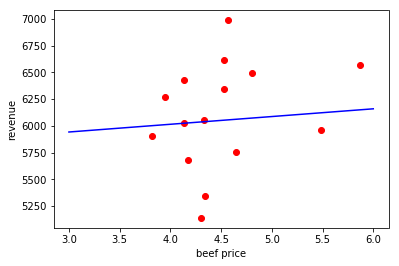

In [16]:
plot.scatter(result['Beef Price'].values ,y,color="red")
rg = np.array(range(3,7))
yrg = 72.273 * rg + (21470/3.75)
plot.plot(rg, yrg, color = 'blue')
plot.xlabel('beef price')
plot.ylabel('revenue')



This chart shows the relationship between revenue and potato prices, and a prediction curve. The x-axis represent the potato price (US dollar) and the y-axis represent the McDonald’s revenue(US dollar)The deviation of data points is low, showing a strong linear negative connection between revenue and potato price.(Coefficient: -6.99996639e+01)

Text(0, 0.5, 'revenue')

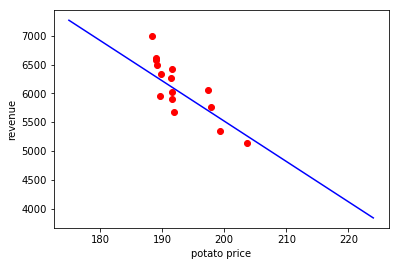

In [17]:
plot.scatter(result['Potato Price'].values ,y,color="red")
rg = np.array(range(175,225))
yrg = -69.9996639 * rg + (21470/1.1)
plot.plot(rg, yrg, color = 'blue')
plot.xlabel('potato price')
plot.ylabel('revenue')

This chart shows the relationship between average McDonald’s stock price and its revenue, and a prediction curve. The x-axis represent the average stock price (US dollar) and the y-axis represent the McDonald’s revenue(US dollar). The data points have intermediate devitation and suggest some negative connections between revenue and stock price. (Coefficient: -1.67816202e+01 )



Text(0, 0.5, 'revenue')

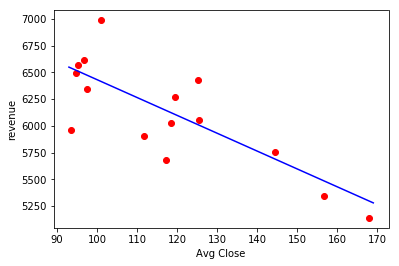

In [18]:

plot.scatter(result['Avg_Close'].values ,y,color="red")

rg = np.array(range(93,170))
yrg = -16.7 * rg + (21470/2.65)
plot.plot(rg, yrg, color = 'blue')
plot.xlabel('Avg Close')
plot.ylabel('revenue')

This chart shows the relationship between revenue and stock volume, and a prediction curve. The x-axis represent the stock volume and the y-axis represent the McDonald’s revenue(US dollar) The prediction curve does not fit data points well and fails to show connections.(Coefficient: -5.73620268e-06)

Text(0, 0.5, 'Revenue')

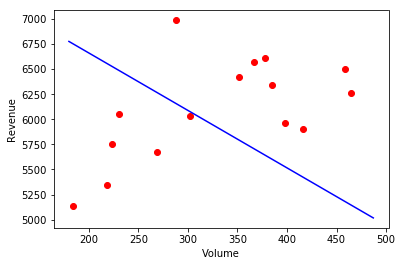

In [19]:
plot.scatter((result['Volume']/1000000).values ,y,color="red")

rg = np.array(range(180,488))
#yrg = 0*rg+ 5000
yrg = -5.73 * rg + (21470)/2.75
plot.plot(rg, yrg, color = 'blue')
plot.xlabel('Volume')
plot.ylabel('Revenue')

In conclusion, potato price and stock price are the most sigficant factors affecting McDonald's revenue, each clearly showing a negative linear connection. On the other hand, stock volume does not seem to relate well to revenue. Although not well fit, the model predicts somewhat positive connection between beef price and revenue.
The conlusion about potato price is the only one that matches our hypothesis, while the others suggest the opposite way.

One possible way to explain the unexpected postivie relationship between the beef prices and McDonald's revenue is the theory of inferior goods. In economic aspect, if the good is considered as inferior, then when the price of the normal goods increses, people will consume more of this goods as substitudes. In our case, other beef meal such as steak might be the normal goods, and McDonald's ground beaf burger might be the inferior goods. When the price of steak increases, people cannot afford that much, so they choose McDonald's as cheaper substitudes. In order to test this assumptions(which also contributes to our analysis in part two), we decide to plot the relationship between the average income of every state and the number of McDonald's to have a sense

In [25]:
# Average income data
p_m_df = pd.read_html('https://www.csun.edu/~sg4002/research/mcdonalds_by_state.htm')[0]
p_m_df.columns = ['st','mc', 'pd', 'more', 'rank','pp','mp','df','rk']
P_m_df = pd.DataFrame(p_m_df[['mp']][1:51])


in_df = pd.read_html('https://www.infoplease.com/business-finance/poverty-and-income/capita-personal-income-state')[0]
In_df = pd.DataFrame(in_df[['2015']])[0:51]
In_df['2015'] = In_df['2015'].replace(',','', regex=True)
In_df.loc[0,'2015'] = 38965
In_df.loc[26,'2015'] = 41280
In_df = pd.DataFrame(In_df[In_df['2015']!='71496'])


/srv/conda/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0, 0.5, 'McDonalds per capita')

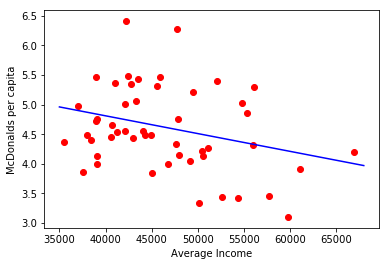

In [26]:
y2 = [float(i) for i in P_m_df['mp'].values]
x2 = In_df['2015'].values.reshape(-1,1)
model2 = LinearRegression()
model2.fit(x2,y2)


plot.scatter(x2 ,y2,color="red")
rg = np.array(range(35000,68000))
yrg = -0.00003 * rg + (model2.intercept_ * 1)

ax1 = plot.subplot(111)
plot.plot(rg, yrg, color = 'blue')
plot.xlabel('Average Income')
plot.ylabel('McDonalds per capita')

This prediction somehow shows a relationship between average income and number of McDonald's per capita, which possibly contributes to our explaination.

# Part 2: Saler Side

# Background and Prior Work

After we conclude several factors that are correlated with McDonald's revenues, we are now interested in how does McDonald's act as a saler in the market. 

This published paper suggests us the regional advertising strategies of McDonald's and how consumer's awareness can affect McDonald's strategies. It help us to relate consumer's sentiments with McDonald's regional strategies. 

* Gerhardt, Hazen, and Lewis. (2014) “Small Business Marketing    Strategy Based on McDonald’s” Proceedings of ASBBS Volume 21 Number 1,
http://asbbs.org/files/ASBBS2014/PDF/G/Gerhardt_Hazen_Lewis(P271-278).pdf

This analysis tells us that McDonald's is growing fastly to occupy the market with several strategies. It help us to focus on the distribution of McDonald's.

* Gregory, Lawrence. “McDonald's Generic Strategy & Intensive Growth Strategies.” Panmore Institute, 5 Feb. 2017, panmore.com/mcdonalds-generic-strategy-intensive-growth-strategies.
http://panmore.com/mcdonalds-generic-strategy-intensive-growth-strategies

# Hypothesis

In this part of the project, we want to explore the business strategies that McDonald's might applied. According to our background references, we find that one major strategy McDonald's uses is intensive growth through franchising, joint ventures and corporate ownership. Also, we want to know does consumer's sentiments influence McDonald's strategies. Hence, we have two assumptions for this part:




1. McDonald's opens more restaurants in the area of which has higher population in order to occupy the market. (Within the range of America) At this point, we believe that the number of McDonald's in an area and the population of this area are highly correlated, supported by our economical intuitions. 

2. At the places where McDonald's open more restaurants, consumer's ratings are higher.(Within the range of America) We believe this through the logic that if consumer ratings are high, then it menas that the consumers are more willing to purchase McDonald's, so McDonald's should open more restaurants.

We are going to test these two assumptions through our data. 

# Dataset(s)

- Dataset Name: Fast Food Restaurants Across America
- Link to the dataset: https://www.kaggle.com/datafiniti/fast-food-restaurants
- Number of observations: 10,000 as whole, 1898 for McDonald's

This is the data of each individual fast food restaurant across America, with their latitudes, longitudes, states, etc. We want to see the distribution of McDonald's nationwide through it.

- Dataset Name: 
Annual Estimates of the Resident Population for the United States, Regions, States, and Puerto Rico: April 1, 2010 to July 1, 2018 (NST-EST2018-01)	
- Link to the dataset: https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html
- Number of observations: 50 states

This dataset contains the census of America in 2018 for each state. 

- Dataset Name:Yelp Dataset
- Link to the dataset: https://www.kaggle.com/yelp-dataset/yelp-dataset/version/4
- Number of observations: 5,200,000 (For the entire dataset, we're going to subtract McDonald's data from it, which is seize of 695)

This is the dataset contains the whole yelp reviews for 5,200,000 restaurants. We're going to take McDonald's reviews and do the analysis.

We will combine this with other datasets through longitudes and latitudes.

# Setup

First, we import the packages we need to use. 

In [21]:
import pandas as pd
import numpy as np
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
import matplotlib.pyplot as plt 

ModuleNotFoundError: No module named 'patsy'

# Data Cleaning

We load the data into dataframes

In [ ]:
# read fast food data
df_across = pd.read_csv('Fastfood_across_nation.csv')
df_across.head()

We drop any null data in our dateframe. In fact, after dropping the null data we still have 10,000 rows, which means that our data doesn't contain any null values. 

In [ ]:
# drop the null data
df_across = df_across.dropna()

Frome the name, we select McDonald's data from all fast food restaurants.

In [ ]:
# take McDonald's
df_across = df_across[(df_across.name == "McDonald's")]

We drop unnecessary details such as id, dateAdded etc. and only keep latitude, longitude, and province.

In [ ]:
df_across = df_across[['latitude', 'longitude', 'province', 'city']]

Let's have a glance of this data. We plot each individual McDonald's restauranbt according to its longitude and latitude.

In [ ]:
# plot McDoanld's 
df_across.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)
plt.show()

From the visualization, we've noticed that the graph form the shape of America, which is great since it means that our data probably represents the McDonald's in the whole America. Also, the distribution of the dots are denser in the west coast and east coast, which follows our common senses that the population in these areas are denser. 

There are several dots outside the mainland of America. We want to know what they are.

In [ ]:
# Alaska
df_across[df_across.latitude > 50]['city'].unique()

After googling, we know that Anchorage is the largest city in Alaska

In [ ]:
# Hawaii and Alaska
df_across[df_across.longitude < -140]['city'].unique()

We find that ths one dot top above is Alaska, and the several dots bellow is Hawaii islands. We decide to keep these data in our dataframe, since they may represent the relationship between population and number of McDonald's too.

We also notice that the province is in acronym. In order to join the dataframe with other dataframes later, we add a column of the full names of the states.

In [ ]:
# Data cleaning
df_across_2 = df_across[['province', 'city']]
df_across_2['city'] = 1
df_across_sum = df_across_2.groupby('province').sum()
df_across_sum = df_across_sum.rename(index=str, columns={"province": "Ac"})
df_across_sum.index.names = ['Ac']
df_across_sum = df_across_sum.rename(index=str, columns={"city": "Count"})

Now we load the population dataset . It seems that this dataset doesn't have any missing value.

In [ ]:
# Read and clean Population
population = pd.read_csv('Population.csv')
population.head()

We drop the unnecessary columns and rename the titles. Also, we add a list of acronyms for each state.

In [ ]:
# Read us states and acronyms table
us_states_list = pd.read_csv('50_us_states.csv')
us_states_list = us_states_list.drop(columns=['State_upper', 'Ac2'])
states = us_states_list.Ac

In [ ]:
population = population.drop(columns=['STATE', 'POPEST18PLUS2018', 'PCNT_POPEST18PLUS'])
population = population.rename(index=str, columns={"NAME": "State", "POPESTIMATE2018":"Population"})
population = pd.merge(population, us_states_list, on='State')
population.head()

We combine the McDonald's distribution dataframe with Population dataframe. In this table, Count represents how many McDonald's are in that state according to our data.

In [ ]:
# Combine two tables and plot the graph
summary_table = pd.merge(population, df_across_sum, on='Ac')
summary_table.head()

In [ ]:
summary_table[['Ac', 'Count']].sort_values('Count', ascending=False).plot.bar('Ac')

We can see that California has the most McDonald's, and Alaska has the least McDonald's

In [ ]:
summary_table[['Ac', 'Population']].sort_values('Population', ascending=False).plot.bar('Ac')

We can see that CA has the most population, and WY has the least.

Finally, sine we also want to test our hypothesis that at the places where McDonald's open more restaurants, consumer's ratings are higher. Hence, we load out yelp data into dataframe.

In [ ]:
# read yelp data
df_yelp = pd.read_csv('yelp_business.csv')
df_yelp.head()

We remove the null data and remove the quotation marks in our data

In [ ]:
df_yelp = df_yelp.dropna()

In [ ]:
# remove quotation mark
df_yelp['name'] = df_yelp['name'].str.replace('"', '')

We take the McDonald's data from them

In [ ]:
# take McDonald's data
df_MD_rate = df_yelp[(df_yelp.name == "McDonald's")]

We've noticed that the data is worldwide. This is not in our expectations, since we believed that Yelp is an American compnay and only contains American data. Hence, we want to select US data from them.

In [ ]:
# slect us data from rating
us_df_MD__rate = df_MD_rate[df_MD_rate['state'].isin(states)]

We plot each McDonald's in our data to take a look. It seems like our data has some problem. We're going to discuss it in our data analysis part

In [ ]:
# plot US rating data
us_df_MD__rate.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, xlim=[-160, -70], ylim=[15, 60])
plt.show()

# Data Cleaning Summary

# Data Analysis & Results

## Part I

First of all, we're going to test our hypothesis 1 that McDonald's opens more restaurants in the area of which has higher population in order to occupy the market. Let's first plot the scatter plot.

In [ ]:
summary_table.plot.scatter('Population', 'Count')

We can see that there's a general pattern between Count of Mcdonald's in a state and the Population of that state. In order to test how strong the correlation is, we're going to fit the linear regression model to it and perform a standard hypthoesis test.

- Null hypothesis: There is no relationship between the Count of McDonald's in a state and the Population of that state.


- Alternative hypothesis:There is a relationship between the Count of McDonald's in a state and the Population of that state.

We use the OLS model to perform linear regression:

In [ ]:
outcome_1, predictors_1 = patsy.dmatrices('Count ~ Population',summary_table)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

In [ ]:
print(res_1.summary())

We plot the regression line on our graph

In [ ]:
# plot the regression line
summary_table.plot.scatter('Population', 'Count')
slope = 4.723e-06
intercept = 8.0041
xs = np.arange(summary_table['Population'].min(), summary_table['Population'].max())
ys = slope * xs + intercept
plt.plot(xs, ys, '--k')

From the summary, we can see that the intercept is 8.0041 amd the slope is 4.723e-06. It has R-squared 0.790. The 95% confidence interval doesn't contain 0. The p-value is smaller than 0.05. Hence, under the 95% confidence level we reject the null hypothesis. We are statistically confident to say that there is a  relationship between the Count of McDonald's in a state and the Population of that state.

We successfuly confirm our hypothesis. In fact, we wanted to do Multiple Linear Regression for this part, yet we failed to find other numerical data such as the regional profits of McDonald's. These data will be helpful to see which factor influence the numerber of McDonald's in a region.

## Part II

In our second goal of this part, we want to test the assumption thatAt the places where McDonald's open more restaurants, consumer's ratings are higher. Nevertheless, from the visulization part above, we found that there are some problems in our data. 

In [ ]:
# plot US rating data
us_df_MD__rate.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, xlim=[-160, -70], ylim=[15, 60])
plt.show()

We've noticed that the dots are lesser than expectation. We group each data by states and see what happened.

In [ ]:
# Missing states in the data
us_df_MD__rate[['state', 'stars']].groupby('state').sum().plot.bar()

We realize that although our dataset is large enough, it was only collected in several states from America. Hence, it is not represented enough. Also, we failed to find other dataset that reflects consumers' ratings. Hence, we conclude that our dataset cannot help us to test our hypothesis.

# Conclusion & Discussion

# Ethics & Privacy

The data used for our observation and analysis was all found from online sources, most of them were open source while a couple we had to pay for ourselves. 
The data was publicly posted and or legally acquired via payment allowing us to analyze the dataset without putting us at risk of violating legal or privacy issues. 
The data sets may reflect biased characteristics because of our lack of knowledge about the background of the change reflects in our data. We lack the strength of analyzing the causation of the change and relating it to a broader social context.
The data used mainly focused on roughly the past 8 years which may limit our vision of analyzing the wholistic trend of McDonald’s business growth.



# Limitations

Our data shows pretty decent correlation between beef price, potato price, and stock volume versus McDonald’s revenue. The data found was each of adequate sizes and contained information important to hypothesis. Although the data individually is significant, as a whole, the data did not overlap as well as expected. Most of the data was acquired in monthly intervals which resulted in pretty large data sets, but because the comparison is intended to be between revenue, which is grouped quartley it shrunk our data set by three. 

Most of the websites we gathered data from were from credible sources. Some of the best data found was not able to be used because it was displayed as pdf and we were unable to convert it into a workable data set. 



# Further directions

 It is shown in our supply model that the potato price is highly correlated with McDonald’s revenue. However, McDonald’s process potatoes mainly by fried that its potato products are cheap but really unhealthy. In the previous work, we know that McDonald’s has a strong promotion strategy and dollar menu is one of its successful business promotion strategy. However, McDonald’s dollar menu mainly consist of oily burgers combining with big amount of fried potatoes. It is reasonable to argue that the dollar menu is able to bring profit to McDonald’s largely due to the low price of potatoes. 
    In our second part of analysis, we can also see that McDonald’s is highly occupied in populated region. Based on our knowledge from previous work, we know that McDonald’s is able to expand successfully based on shared ownership with local business owners that the ensured profit allow them willingly open new shops in the expected region. However, it is also discussed that the local owners have to listen to the headquarter of McDonald’s for the decision of design, products, promotion strategy, etc. 
   Combining our two parts of research, we see that McDonald’s is a highly aggressive expanding business, yet its profitting strategy is not that based on the consideration of public health. In the future research and suggestions, we would like to see a more targeted regulation or limitation of McDonald’s products promotion. 

